# GRAPL: Tutorial 04


Tutorial illustrating the use of the GRAPL library, for representing, analyzing and processing
**acyclic directed mixed graphs** (**ADMG**s) for structural causal modelling.

**License**: CC BY-SA 4.0 2021. 


If you use this code, please cite:

Little, M. A., Badawy, R. (2019). [Causal bootstrapping](https://arxiv.org/pdf/1910.09648.pdf), *ArXiV*, arXiv:1910.09648

In [1]:
import grapl.algorithms as algs
import grapl.dsl as dsl

### Create a GRAPL DSL parser

In [2]:
grapl_obj = dsl.GraplDSL()

### Read a DAG from a `.grapl` file

In [3]:
G = grapl_obj.readgrapl(open('../graphs/richardson_2017.grapl', 'r').read())

### Display the DAG object

#### Text description

In [4]:
G.display()

Title: "Richardson et al. 2017, Figure 3"
Vars: X3,X4,X2,X1
Parents:
X3 <- X2,X1
X4 <- X3
X2 <- X1
Children:
X3 -> X4
X2 -> X3
X1 -> X3,X2
Bidirects:
X4 <--> X2
X2 <--> X4


#### Graph

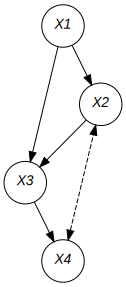

In [5]:
G

### Check if the ADMG is acyclic

In [6]:
G.isayclic() # Expected: True

True

### Get topological sort of DAG nodes

In [7]:
G.topsort()

['X1', 'X2', 'X3', 'X4']

### Compute all ADMG districts

In [8]:
G.districts() # Expected: [{'X3'}, {'X2', 'X4'}, {'X1'}]

[{'X3'}, {'X2', 'X4'}, {'X1'}]

### Get interventional (cause-effect) distribution of `X2` on `X4`

In [9]:
id_str, id_eqn, isident = algs.idfixing(G, {'X2'}, {'X4'})
id_eqn

### Get all interventional (causal_effect) distribution expression of `X2` on `X4`

In [10]:
id_str_all, id_eqn_all, tracking_info, isident = algs.idfix_all(G, {'X2'}, {'X4'}, mode = "all")
id_eqn_all[0]

In [11]:
id_eqn_all[1]

### Checking one of the corresponding fixing sequences infomation

In [12]:
print(tracking_info[id_str_all[1]][0])

****************************************
Fixing district:X3
--------------------
Fixable nodes:['X4', 'X1']
fixed node:X4
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
X2<-X1
Children:
X2->X3
X1->X3,X2
Bidirects:
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X2
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
--------------------
Fixable nodes:['X1']
fixed node:X1
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
For the solving district, final D_expr:p(X3,X2,X1)/p(X2,X1)
****************************************
Fixing district:X4
--------------------
Fixable nodes:['X3', 'X1']
fixed node:X3
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
X2<-X1
Children:
X3->X4
X1->X2
Bidirects:
X4<-->X2
X2<-->X4
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X1
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
X2<-X1
Children:
X3->X4
X1->X2
Bidirects:
X4<-->X2
X

### Get the interventional (causal_effect) distribution expression of `X2` on `X4` with the least number of distributions

In [13]:
id_str_short, id_eqn_short, tracking_info, isident = algs.idfix_all(G, {'X2'}, {'X4'}, mode = "shortest")
id_eqn_short

### Checking one of the corresponding fixing sequences infomation

In [14]:
print(tracking_info[0])

****************************************
Fixing district:X3
--------------------
Fixable nodes:['X4', 'X1']
fixed node:X4
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
X2<-X1
Children:
X2->X3
X1->X3,X2
Bidirects:
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X2
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
--------------------
Fixable nodes:['X1']
fixed node:X1
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
For the solving district, final D_expr:p(X3,X2,X1)/p(X2,X1)
****************************************
Fixing district:X4
--------------------
Fixable nodes:['X3', 'X1']
fixed node:X3
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
X2<-X1
Children:
X3->X4
X1->X2
Bidirects:
X4<-->X2
X2<-->X4
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X1
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
X2<-X1
Children:
X3->X4
X1->X2
Bidirects:
X4<-->X2
X

### Get the interventional (causal_effect) distribution expression of `X2` on `X4` with the most number of marginalized variables

In [15]:
id_str_mostmrg, id_eqn_mostmrg, tracking_info, isident = algs.idfix_all(G, {'X2'}, {'X4'}, mode = "mostmrg")
id_eqn_mostmrg

### Checking one of the corresponding fixing sequences infomation

In [16]:
print(tracking_info[0])

****************************************
Fixing district:X3
--------------------
Fixable nodes:['X4', 'X1']
fixed node:X4
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
X2<-X1
Children:
X2->X3
X1->X3,X2
Bidirects:
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X2
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
--------------------
Fixable nodes:['X1']
fixed node:X1
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
For the solving district, final D_expr:p(X3,X2,X1)/p(X2,X1)
****************************************
Fixing district:X4
--------------------
Fixable nodes:['X3', 'X1']
fixed node:X3
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
X2<-X1
Children:
X3->X4
X1->X2
Bidirects:
X4<-->X2
X2<-->X4
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X2
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
Children:
X3->X4
Bidirects:
--------------------
Fix

### Get a randomly selected interventional (causal_effect) distribution expression of `X2` on `X4` from all possible ones

In [17]:
id_str_rd, id_eqn_rd, tracking_info, isident = algs.idfix_all(G, {'X2'}, {'X4'}, mode = "random")
id_eqn_rd

### Checking one of the corresponding fixing sequences infomation

In [18]:
print(tracking_info[0])

****************************************
Fixing district:X3
--------------------
Fixable nodes:['X4', 'X1']
fixed node:X4
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
X2<-X1
Children:
X2->X3
X1->X3,X2
Bidirects:
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X2
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
--------------------
Fixable nodes:['X1']
fixed node:X1
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X3<-X2,X1
Children:
X2->X3
X1->X3
Bidirects:
For the solving district, final D_expr:p(X3,X2,X1)/p(X2,X1)
****************************************
Fixing district:X4
--------------------
Fixable nodes:['X3', 'X1']
fixed node:X3
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
X2<-X1
Children:
X3->X4
X1->X2
Bidirects:
X4<-->X2
X2<-->X4
--------------------
Fixable nodes:['X2', 'X1']
fixed node:X2
*****Fixed Graph*****
Vars: X3,X4,X2,X1
Parents:
X4<-X3
Children:
X3->X4
Bidirects:
--------------------
Fix